<a href="https://colab.research.google.com/github/yuanjinren/DS-Unit-2-Applied-Modeling/blob/master/module4-model-interpretation/YuanjinRen_LS_DS_234_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Lambda School Data Science

*Unit 2, Sprint 3, Module 4*

---

# Model Interpretation

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] Continue to iterate on your project: data cleaning, exploratory visualization, feature engineering, modeling.
- [ ] Make at least 1 partial dependence plot to explain your model.
- [ ] Make at least 1 Shapley force plot to explain an individual prediction.
- [ ] **Share at least 1 visualization (of any type) on Slack!**

If you aren't ready to make these plots with your own dataset, you can practice these objectives with any dataset you've worked with previously. Example solutions are available for Partial Dependence Plots with the Tanzania Waterpumps dataset, and Shapley force plots with the Titanic dataset. (These datasets are available in the data directory of this repository.)

Please be aware that **multi-class classification** will result in multiple Partial Dependence Plots (one for each class), and multiple sets of Shapley Values (one for each class).

## Stretch Goals

#### Partial Dependence Plots
- [ ] Make multiple PDPs with 1 feature in isolation.
- [ ] Make multiple PDPs with 2 features in interaction. 
- [ ] Use Plotly to make a 3D PDP.
- [ ] Make PDPs with categorical feature(s). Use Ordinal Encoder, outside of a pipeline, to encode your data first. If there is a natural ordering, then take the time to encode it that way, instead of random integers. Then use the encoded data with pdpbox. Get readable category names on your plot, instead of integer category codes.

#### Shap Values
- [ ] Make Shapley force plots to explain at least 4 individual predictions.
    - If your project is Binary Classification, you can do a True Positive, True Negative, False Positive, False Negative.
    - If your project is Regression, you can do a high prediction with low error, a low prediction with low error, a high prediction with high error, and a low prediction with high error.
- [ ] Use Shapley values to display verbal explanations of individual predictions.
- [ ] Use the SHAP library for other visualization types.

The [SHAP repo](https://github.com/slundberg/shap) has examples for many visualization types, including:

- Force Plot, individual predictions
- Force Plot, multiple predictions
- Dependence Plot
- Summary Plot
- Summary Plot, Bar
- Interaction Values
- Decision Plots

We just did the first type during the lesson. The [Kaggle microcourse](https://www.kaggle.com/dansbecker/advanced-uses-of-shap-values) shows two more. Experiment and see what you can learn!

### Links

#### Partial Dependence Plots
- [Kaggle / Dan Becker: Machine Learning Explainability — Partial Dependence Plots](https://www.kaggle.com/dansbecker/partial-plots)
- [Christoph Molnar: Interpretable Machine Learning — Partial Dependence Plots](https://christophm.github.io/interpretable-ml-book/pdp.html) + [animated explanation](https://twitter.com/ChristophMolnar/status/1066398522608635904)
- [pdpbox repo](https://github.com/SauceCat/PDPbox) & [docs](https://pdpbox.readthedocs.io/en/latest/)
- [Plotly: 3D PDP example](https://plot.ly/scikit-learn/plot-partial-dependence/#partial-dependence-of-house-value-on-median-age-and-average-occupancy)

#### Shapley Values
- [Kaggle / Dan Becker: Machine Learning Explainability — SHAP Values](https://www.kaggle.com/learn/machine-learning-explainability)
- [Christoph Molnar: Interpretable Machine Learning — Shapley Values](https://christophm.github.io/interpretable-ml-book/shapley.html)
- [SHAP repo](https://github.com/slundberg/shap) & [docs](https://shap.readthedocs.io/en/latest/)

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*
    !pip install eli5
    !pip install pdpbox
    !pip install shap

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
pd.options.display.float_format = '{:,.0f}'.format

In [0]:
df2014 = pd.read_csv('/content/drive/My Drive/Data/2014_Financial_Data.csv')
df2015 = pd.read_csv('/content/drive/My Drive/Data/2015_Financial_Data.csv')
df2016 = pd.read_csv('/content/drive/My Drive/Data/2016_Financial_Data.csv')
df2017 = pd.read_csv('/content/drive/My Drive/Data/2017_Financial_Data.csv')
df2018 = pd.read_csv('/content/drive/My Drive/Data/2018_Financial_Data.csv')
df2014.shape,df2015.shape,df2016.shape,df2017.shape,df2018.shape

((3808, 225), (4120, 225), (4797, 225), (4960, 225), (4392, 225))

In [0]:
df2018.head()

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,...,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),10Y Net Income Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),10Y Shareholders Equity Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),10Y Dividend per Share Growth (per Share),5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2019 PRICE VAR [%],Class
0,CMCSA,"94,507,000,000",0,0,"94,507,000,000",0,"64,822,000,000","75,498,000,000","19,009,000,000","3,542,000,000","15,111,000,000","3,380,000,000","131,000,000",0,"11,731,000,000",0,"11,731,000,000",3,3,"4,549,504,769","4,549,504,769",1,1,0,0,0,0,"29,329,000,000","18,653,000,000","11,862,000,000",0,0,"3,814,000,000",0,"3,814,000,000","11,104,000,000",0,"21,848,000,000","44,437,000,000","167,623,000,000",...,4,0,0,-3,0,0,0,-0,-0,-0,-0,-0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,Consumer Cyclical,33,1
1,KMI,"14,144,000,000",0,"7,288,000,000","6,856,000,000",0,"601,000,000","3,062,000,000","3,794,000,000","1,917,000,000","2,196,000,000","587,000,000","310,000,000",0,"1,609,000,000","128,000,000","1,481,000,000",1,1,"2,207,018,287","2,216,000,000",1,0,0,0,0,0,"6,410,000,000","4,113,000,000","1,919,000,000",0,0,"3,280,000,000",0,"3,280,000,000","1,498,000,000","385,000,000","5,722,000,000","37,897,000,000","24,845,000,000",...,3,35,0,-1,0,0,0,54,65,65,-0,-0,0,0,0,nan,-0,-0,nan,-0,-0,nan,-0,1,nan,0,-0,0,-0,-0,0,-0,-0,0,-0,0,-0,Energy,41,1
2,INTC,"70,848,000,000",0,"27,111,000,000","43,737,000,000","13,543,000,000","6,750,000,000","20,421,000,000","23,316,000,000","-126,000,000","23,317,000,000","2,264,000,000",0,0,"21,053,000,000",0,"21,053,000,000",5,4,"4,564,000,000","4,611,000,000",1,1,0,0,0,0,"32,276,000,000","23,191,000,000","21,053,000,000",0,0,"3,019,000,000","8,631,000,000","11,650,000,000","6,722,000,000","7,253,000,000","28,787,000,000","48,976,000,000","36,349,000,000",...,6,10,0,-3,0,0,0,1,1,1,-0,-0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0,0,-0,Technology,30,1
3,MU,"30,391,000,000",0,"12,500,000,000","17,891,000,000","2,141,000,000","813,000,000","2,897,000,000","14,994,000,000","342,000,000","14,303,000,000","168,000,000","3,000,000",0,"14,135,000,000",0,"14,135,000,000",12,12,"1,159,810,627","1,152,000,000",0,1,1,0,0,0,"19,404,000,000","14,645,000,000","14,138,000,000",0,0,"6,506,000,000","296,000,000","6,802,000,000","5,478,000,000","3,595,000,000","16,039,000,000","23,672,000,000","1,559,000,000",...,2,9,0,-8,1,2,2,2,2,2,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,-1,0,0,Technology,64,1
4,GE,"121,615,000,000",0,"95,461,000,000","26,154,000,000",0,"18,111,000,000","40,711,000,000","-14,5

In [0]:
df2018.rename(columns={
    '2019 PRICE VAR [%]':'2019'
},inplace=True)

In [0]:
columns = ['Enterprise Value over EBITDA',
           'Net Income per Share',
           'Net Cash/Marketcap',
           'Operating Cash Flow growth',
           'Earnings Yield',
           'grossProfitMargin',
           'Revenue Growth',
           '2019']

In [0]:
df_2018 = df2018[columns]
df_2018.describe()

,Enterprise Value over EBITDA,Net Income per Share,Net Cash/Marketcap,Operating Cash Flow growth,Earnings Yield,grossProfitMargin,Revenue Growth,2019
count,"3,546","4,135","3,894","4,250","4,140","4,045","4,253","4,392"
mean,20,"16,391",-1,-5,0,0,3,21
std,169,"507,621",10,283,251,2,196,83
min,0,"-1,016,410",-211,"-18,001","-9,992",-87,-3,-100
25%,2,-0,-1,-0,-0,0,0,-7
50%,9,1,-0,0,0,0,0,18
75%,15,3,0,0,0,1,0,40
max,"8,888","27,643,890",502,239,"12,673",2,"12,739","3,757"


In [0]:
df_2018.shape

(4392, 8)

In [0]:
df_2018.isnull().sum()

Enterprise Value over EBITDA    846
Net Income per Share            257
Net Cash/Marketcap              498
Operating Cash Flow growth      142
Earnings Yield                  252
grossProfitMargin               347
Revenue Growth                  139
2019                              0
dtype: int64

In [0]:
train = df_2018[-3500:]
val = df_2018[-4000:-3500]
test = df_2018[-4392:-4000]
train.shape, val.shape,test.shape

((3500, 8), (500, 8), (392, 8))

In [0]:
target = '2019'
features = df_2018.columns.drop('2019')

X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]

X_test = test[features]
y_test = test[target]

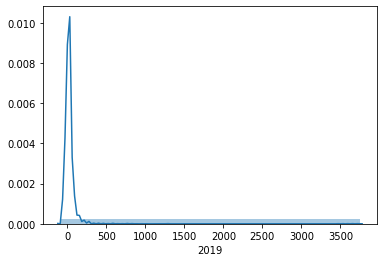

In [0]:
sns.distplot(y_train, bins=1);

In [0]:
from sklearn.metrics import r2_score, mean_absolute_error

In [0]:
guess = y_train.mean()
Baseline = len(y_train) * [guess]
mae = mean_absolute_error(y_train, Baseline)
print(f'Training set Baseline error: {mae:.2f}')

Training set Baseline error: 38.78


In [0]:
! pip install category_encoders==2.*

     |████████████████████████████████| 81kB 2.2MB/s 


In [0]:
#Fit linear regression model
import category_encoders as ce
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [0]:
lr = make_pipeline(
    SimpleImputer(strategy = 'median'),
    StandardScaler(),
    LinearRegression()
)

lr.fit(X_train, y_train)
print('Linear Regression R^2', lr.score(X_val, y_val))

Linear Regression R^2 -0.0307722758237412


In [0]:
coefficients = lr.named_steps['linearregression'].coef_
pd.Series(coefficients, features)

Enterprise Value over EBITDA   -1
Net Income per Share           -0
Net Cash/Marketcap             -0
Operating Cash Flow growth      0
Earnings Yield                  1
grossProfitMargin              -1
Revenue Growth                 -0
dtype: float64

In [0]:
#Fit gradient boosting model

In [0]:
from xgboost import XGBRegressor

In [0]:
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)

In [0]:
gb = make_pipeline(
    XGBRegressor(n_estimators=200, objective='reg:squarederror', n_jobs=-1)
)

gb.fit(X_train_imputed, y_train)
y_pred = gb.predict(X_val_imputed)
print('Gradient Boosting R^2', r2_score(y_val, y_pred))
#Negative R2 means this model is doing worse than the mean value. 

Gradient Boosting R^2 -0.0218668466570362


### Use a different dataset to do model interpretation

In [0]:
DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

In [427]:
sales = pd.read_csv(DATA_PATH+'condos/NYC_Citywide_Rolling_Calendar_Sales.csv')
sales.shape

(23040, 21)

In [423]:
sales.describe(exclude='number')

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,LAND SQUARE FEET,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
count,23040,23040,23039,23039,23040,5201,22987,23040,23040,23040
unique,252,44,10,146,22691,1724,3652,147,3831,120
top,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,D4,100 JEROME STREET,4,0,D4,$ - 0,01/24/2019
freq,685,5061,11071,3408,6,99,7500,3408,6909,480


In [0]:
sales.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,2,716,1246,NaN,R4,"447 WEST 18TH STREET, PH12A",PH12A,10011.0,1.0,0.0,1.0,"10,733",1979.0,2007.0,2,R4,$ - 0,01/01/2019
1,1,FASHION,21 OFFICE BUILDINGS,4,812,68,NaN,O5,144 WEST 37TH STREET,NaN,10018.0,0.0,6.0,6.0,"2,962",15435.0,1920.0,4,O5,$ - 0,01/01/2019
2,1,FASHION,21 OFFICE BUILDINGS,4,839,69,NaN,O5,40 WEST 38TH STREET,NaN,10018.0,0.0,7.0,7.0,"2,074",11332.0,1930.0,4,O5,$ - 0,01/01/2019
3,1,GREENWICH VILLAGE-WEST,13 CONDOS - ELEVATOR APARTMENTS,2,592,1041,NaN,R4,"1 SHERIDAN SQUARE, 8C",8C,10014.0,1.0,0.0,1.0,0,500.0,0.0,2,R4,$ - 0,01/01/2019
4,1,UPPER EAST SIDE (59-79),15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,1379,1402,NaN,R1,"20 EAST 65TH STREET, B",B,10065.0,1.0,0.0,1.0,0,6406.0,0.0,2,R1,$ - 0,01/01/2019


In [0]:
def wrangle(X):

  X['SALE PRICE'] = X['SALE PRICE'].str.strip('$ - ')
  X['SALE PRICE'] = X['SALE PRICE'].str.replace(',','',regex=False).astype(float)
  X['BLOCK'] = X['BLOCK'].astype(int)
  X['LOT'] = X['LOT'].astype(int)
  X['LAND SQUARE FEET'] = X['LAND SQUARE FEET'].str.replace(',','',regex=False)
  X['LAND SQUARE FEET'] = X['LAND SQUARE FEET'].str.replace('########','0',regex=False).astype(float)
  X['GROSS SQUARE FEET'] = X['GROSS SQUARE FEET'].astype(float)
  X['SALE DATE'] = pd.to_datetime(X['SALE DATE'],infer_datetime_format=True)
  X=X.drop(['BOROUGH','NEIGHBORHOOD','BUILDING CLASS CATEGORY','BUILDING CLASS AT PRESENT','TAX CLASS AT PRESENT','BUILDING CLASS AT TIME OF SALE','EASE-MENT','ADDRESS','APARTMENT NUMBER','YEAR BUILT','SALE DATE'],axis=1,inplace=True)
  
  return X

In [0]:
wrangle(sales)

In [0]:
sales.head()

,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,716,1246,R4,10011.0,1.0,0.0,1.0,10733.0,1979.0,2,R4,0.0,2019-01-01
1,812,68,O5,10018.0,0.0,6.0,6.0,2962.0,15435.0,4,O5,0.0,2019-01-01
2,839,69,O5,10018.0,0.0,7.0,7.0,2074.0,11332.0,4,O5,0.0,2019-01-01
3,592,1041,R4,10014.0,1.0,0.0,1.0,0.0,500.0,2,R4,0.0,2019-01-01
4,1379,1402,R1,10065.0,1.0,0.0,1.0,0.0,6406.0,2,R1,0.0,2019-01-01


In [0]:
sales.columns

Index(['BLOCK', 'LOT', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS',
       'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE'],
      dtype='object')

In [0]:
sales.isnull().sum()

BLOCK                              0
LOT                                0
ZIP CODE                           1
RESIDENTIAL UNITS                  1
COMMERCIAL UNITS                   1
TOTAL UNITS                        1
LAND SQUARE FEET                  53
GROSS SQUARE FEET                  1
TAX CLASS AT TIME OF SALE          0
BUILDING CLASS AT TIME OF SALE     0
SALE PRICE                         0
dtype: int64

In [0]:
sales.shape

(23040, 10)

In [0]:
train = sales[-20000:]
val = sales[-22000:-20000]
test = sales[:-22000]

In [430]:
train.shape, val.shape, test.shape

((20000, 10), (2000, 10), (1040, 10))

In [0]:
target = 'SALE PRICE'
features = sales.columns.drop(target)

In [0]:
X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]

X_test = test[features]
y_test = test[target]

In [0]:
y_train.value_counts()

0.0          5922
10.0          170
800000.0      109
750000.0      108
650000.0      108
             ... 
1107250.0       1
390500.0        1
4429042.0       1
39950.0         1
319600.0        1
Name: SALE PRICE, Length: 3515, dtype: int64

In [0]:
y_train.describe()

count    2.000000e+04
mean     1.306543e+06
std      9.376577e+06
min      0.000000e+00
25%      0.000000e+00
50%      4.618100e+05
75%      8.852195e+05
max      8.500000e+08
Name: SALE PRICE, dtype: float64

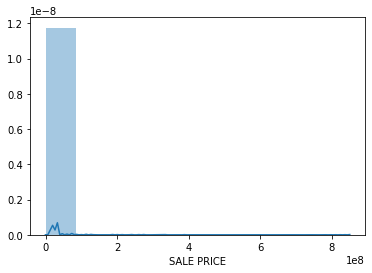

In [433]:
# check the distribution of target
import seaborn as sns
sns.distplot(y_train,bins=10);

In [0]:
from sklearn.metrics import r2_score, mean_absolute_error

In [435]:
#fit linear regression model
sales_guess = y_train.mean()
sales_guess

1306542.99845

In [436]:
Baseline = len(y_train) * [sales_guess]
mae = mean_absolute_error(y_train, Baseline)
print(f'Training set Baseline error: {mae:.2f}')

Training set Baseline error: 1570064.79


In [0]:
! pip install category_encoders==2.*

     |████████████████████████████████| 81kB 2.1MB/s 


In [0]:
X_train.dtypes

BLOCK                          int64
LOT                            int64
ZIP CODE                     float64
RESIDENTIAL UNITS            float64
COMMERCIAL UNITS             float64
TOTAL UNITS                  float64
LAND SQUARE FEET             float64
GROSS SQUARE FEET            float64
TAX CLASS AT TIME OF SALE      int64
dtype: object

In [0]:
X_train.head()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE
3040,6224,60,11228.0,1.0,0.0,1.0,2800.0,2124.0,1
3041,6158,42,11228.0,2.0,1.0,3.0,2613.0,3300.0,1
3042,6168,71,11228.0,2.0,0.0,2.0,3000.0,4640.0,1
3043,6249,52,11214.0,2.0,0.0,2.0,3000.0,2320.0,1
3044,6342,6,11214.0,2.0,0.0,2.0,1680.0,1403.0,1


In [0]:
#Fit linear regression model
import category_encoders as ce
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [0]:
lreg = make_pipeline( 
    SimpleImputer(), 
    StandardScaler(),
    LinearRegression()
)

In [439]:
lreg.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [0]:
y_test_lr = lreg.predict(X_test)

In [440]:
print('Linear Regression R^2', lreg.score(X_val, y_val))

Linear Regression R^2 0.5815833222516522


In [460]:
print('Linear Regression R^2', lreg.score(X_test, y_test))

Linear Regression R^2 0.21088362879641764


In [442]:
coefficients = lreg.named_steps['linearregression'].coef_
pd.Series(coefficients, features)

BLOCK                       -1.119294e+05
LOT                          9.211889e+04
ZIP CODE                    -1.223567e+05
RESIDENTIAL UNITS            1.346148e+06
COMMERCIAL UNITS             2.497090e+06
TOTAL UNITS                 -2.574852e+06
LAND SQUARE FEET            -2.487166e+05
GROSS SQUARE FEET            4.656943e+06
TAX CLASS AT TIME OF SALE    3.667889e+05
dtype: float64

In [0]:
X_val.head()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE
1040,5722,445,10463.0,0.0,0.0,0.0,0.0,0.0,2
1041,3667,29,10473.0,2.0,0.0,2.0,1743.0,2310.0,1
1042,3773,33,10472.0,3.0,0.0,3.0,2500.0,2480.0,1
1043,5520,57,10465.0,1.0,0.0,1.0,4490.0,1660.0,1
1044,4700,46,10469.0,1.0,0.0,1.0,1748.0,992.0,1


In [0]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 72

In [444]:
!pip install pdpbox
!pip install shap

In [0]:
from pdpbox.pdp import pdp_isolate, pdp_plot

In [0]:
feature = 'LAND SQUARE FEET'

isolated = pdp_isolate(
    model=lreg,
    dataset=X_val,
    model_features=X_val.columns,
    feature=feature
)

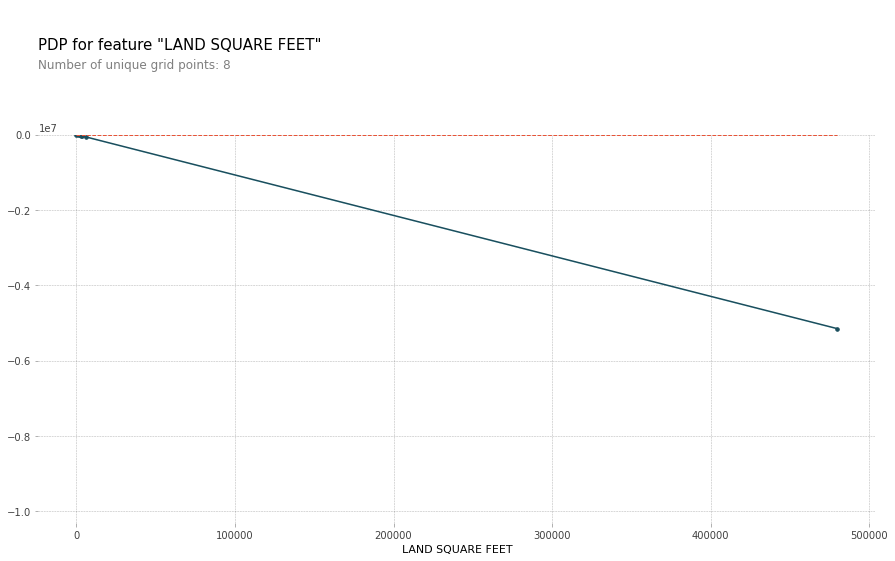

In [462]:
pdp_plot(isolated, feature_name=feature);

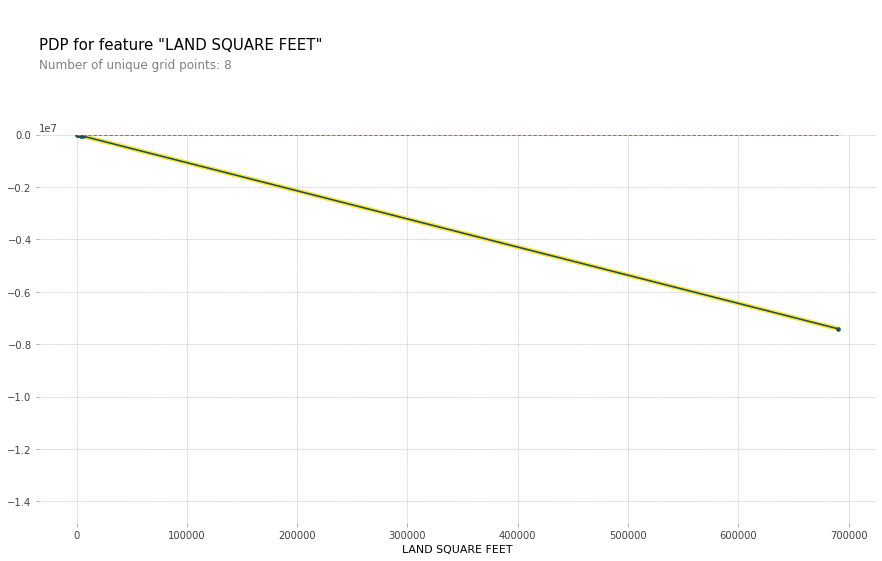

In [454]:
pdp_plot(isolated, feature_name=feature, plot_lines=True, frac_to_plot=0.01);

In [0]:
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

In [464]:
gboost = make_pipeline(
    SimpleImputer(),
    XGBRegressor(n_estimators=200, objective='reg:squarederror', n_jobs=-1)
)

gboost.fit(X_train, y_train)
y_pred_boost = gboost.predict(X_val)
y_pred_test = gboost.predict(X_test)
print('Gradient Boosting R^2 of validation set', r2_score(y_val, y_pred_boost))
print('Gradient Boosting R^2 of testing set', r2_score(y_test, y_pred_test))

Gradient Boosting R^2 of validation set 0.5962897530131572
Gradient Boosting R^2 of testing set -0.9474343062820523


In [0]:
feature_b = 'LAND SQUARE FEET'

isolated = pdp_isolate(
    model = gboost,
    dataset = X_val,
    model_features=X_val.columns,
    feature=feature_b
)

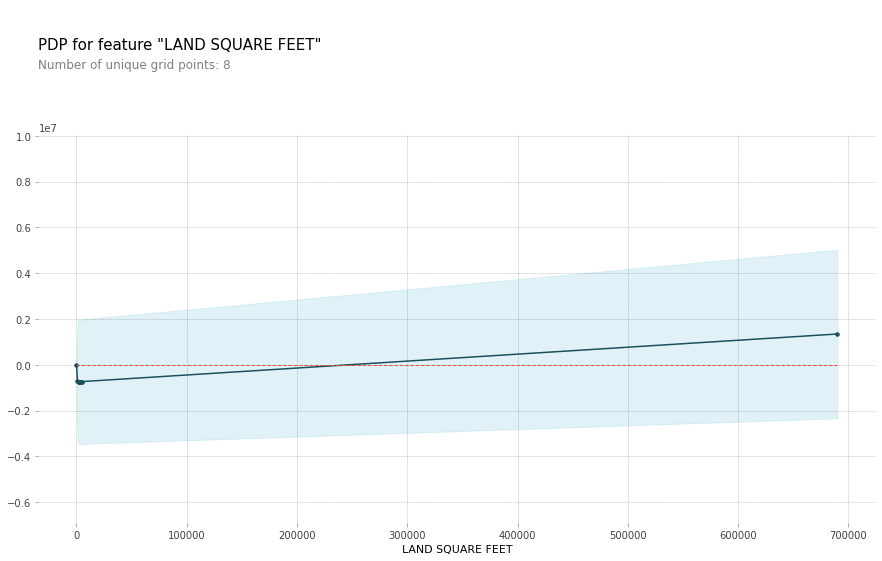

In [467]:
pdp_plot(isolated, feature_name=feature_b);

(<Figure size 1080x684 with 2 Axes>,
 {'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fe4af42aa58>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fe4af424cc0>})

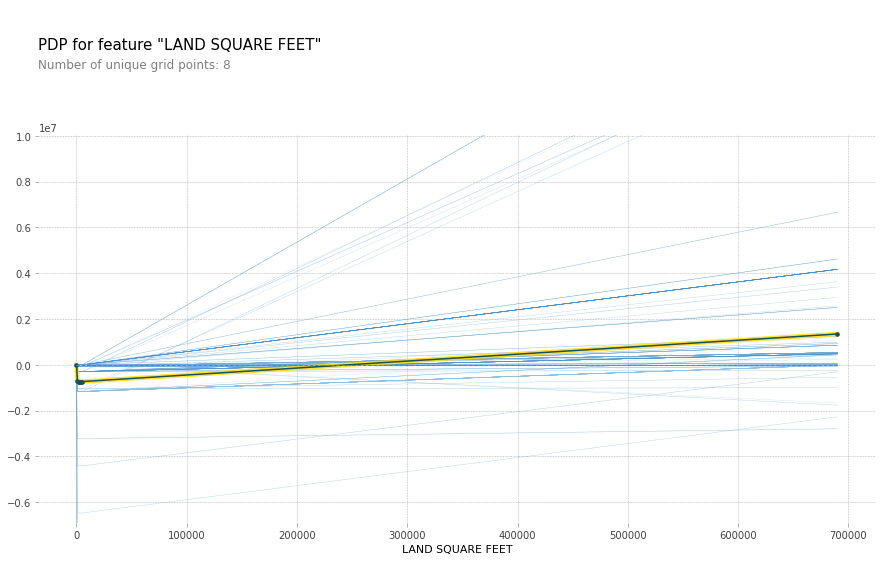

In [468]:
pdp_plot(isolated, feature_name=feature_b, plot_lines=True, frac_to_plot=0.1)

In [0]:
isolated = pdp_isolate(
    model = gboost,
    dataset = X_val,
    model_features=X_val.columns,
    feature=feature_b,
    num_grid_points=5000
)

(<Figure size 1080x684 with 2 Axes>,
 {'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fe4af5b8cf8>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fe4afdae160>})

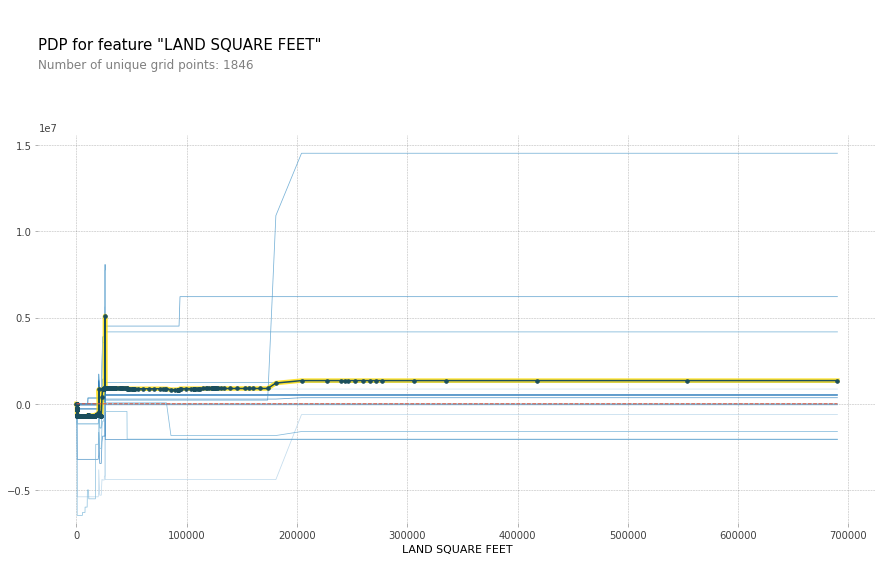

In [474]:
pdp_plot(isolated, feature_name=feature_b, plot_lines=True, frac_to_plot=0.01)

In [0]:
# Partial Dependence Plots with 2 features
from pdpbox.pdp import pdp_interact, pdp_interact_plot

In [0]:
features_b = ['LAND SQUARE FEET','LOT']

interact = pdp_interact(
    model=gboost,
    dataset=X_val,
    model_features=X_val.columns,
    features=features_b
)

(<Figure size 540x684 with 3 Axes>,
 {'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fe4a30b1ba8>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fe4a30a1320>})

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


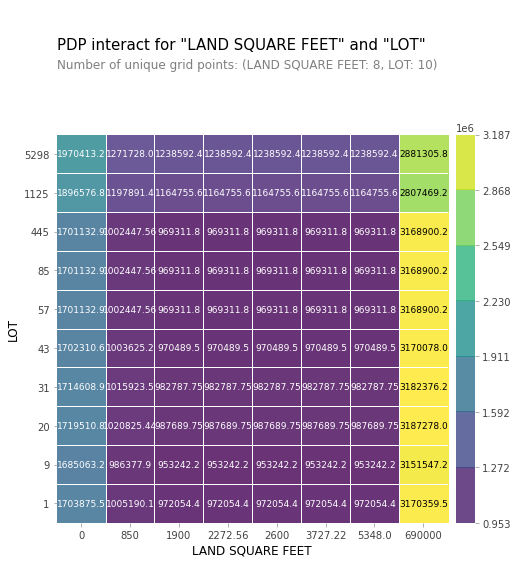

In [477]:
pdp_interact_plot(interact, plot_type='grid', feature_names=features_b)

In [0]:
pdp = interact.pdp.pivot_table(
    values='preds',
    columns=features_b[0],
    index=features_b[1]
)

In [480]:
import plotly.graph_objs as go

surface = go.Surface(
    x=pdp.columns, 
    y=pdp.index, 
    z=pdp.values
)


layout = go.Layout(
    scene=dict(
        xaxis=dict(title=features_b[0]), 
        yaxis=dict(title=features_b[1]), 
        zaxis=dict(title=target)
    )
)

fig = go.Figure(surface, layout)
fig.show()

In [0]:
import shap

In [0]:
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV

In [0]:
param_distributions = {
    'n_estimators': randint(50,500),
    'max_depth': [5,10,15],
    'max_features':uniform(0,1)
}

In [0]:
search = RandomizedSearchCV(
    XGBRegressor(random_state=42),
    param_distributions=param_distributions,
    n_iter=5,
    cv=5,
    verbose=10,
    n_jobs=-1,
    random_state=42
)

In [501]:
search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   27.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   54.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  4.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  4.6min finished


[23:24:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=42, reg_alpha...
                                          verbosity=1),
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15],
        

In [502]:
print('Best hyperparameters', search.best_params_)

Best hyperparameters {'max_depth': 15, 'max_features': 0.7796910002727693, 'n_estimators': 70}


In [0]:
model=search.best_estimator_

In [511]:
row = X_val.iloc[[0]]
row

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE
1040,5722,445,10463.0,0.0,0.0,0.0,0.0,0.0,2


In [513]:
y_val.iloc[0]

182000.0

In [514]:
model.predict(row)

array([242216.14], dtype=float32)

In [515]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(row)
shap_values

array([[-426113.94 ,  -94773.88 , -163556.8  ,   36444.117,   -6031.791,
         -48024.05 ,  400298.56 , -713164.3  ,  -43469.332]],
      dtype=float32)

In [516]:
explainer.expected_value

1300597.6

In [517]:
y_val.mean()

1357329.2795

In [518]:
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values,
    features=row
)